## Mapping Calais, VT bedrock tiles with Izzy's study wells

### TO DO:

- [x] make contextual VT map
- [x] add well coordinates
- [ ] add spatial ref bar and N
- [ ] lat and long
  

    - Vermont bedrock units here:
         https://geodata.vermont.gov/datasets/d875c5418f41421db1c51597ba1333a0_165/explore
         
         However, doesn't distinguish between Waits River Formation thick and thin, the primary distinction in the well sample set.
         
    - Geology and hydrogeology of the Town of Calais, Vermont
        
        https://geodata.vermont.gov/documents/2563976443e540e38f7df5748f49a5df/about
    
        There is no bedrock data for the Calais quadrangle, that we can find. 

(2500000.0, 2710000.0)

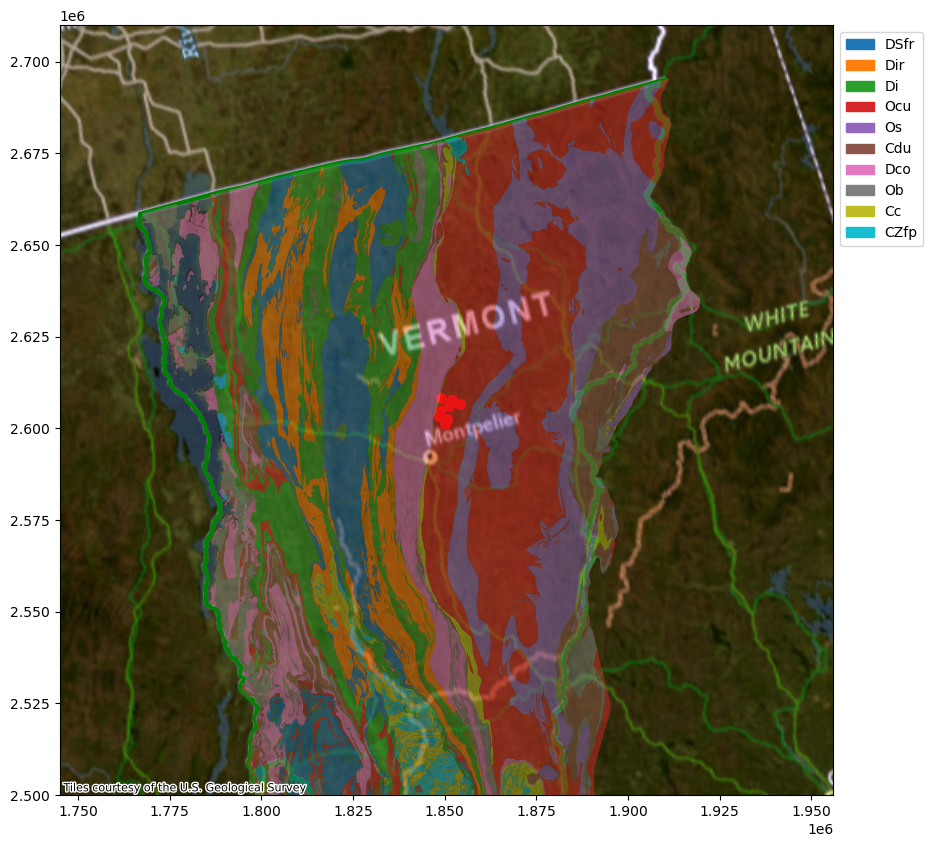

In [13]:
#####################
# READ IN LIBRARIES #
#####################

import pandas as pd  
import numpy as np  
import geopandas as gpd  
import matplotlib.pyplot as plt # plot our data and manipulate the plot
import contextily as ctx # add a default basemap under our polygons of interest
from shapely.geometry import Point, Polygon
import matplotlib.patches as mpatches

############################
# VIEW CONTEXTILY BASEMAPS #
############################

# Using contextily for basemaps (https://dlab.berkeley.edu/news/adding-basemaps-python-contextily)
# change basemap - can be one of these
# first see available provider names

#print(ctx.providers.keys())
#print(ctx.providers.USGS.keys())
#print(ctx.providers.OpenStreetMap.keys())

#####################################
# READ IN SHP FILES AND SITE COORDS #
#####################################

# Read in Vermont state boundary polygon;
# Vermont state bedrock unit shapefiles;
# And Calais, VT town hydro geo shapefiles
VT_poly = gpd.read_file('FS_VCGI_OPENDATA_Boundary_BNDHASH_poly_vtbnd_SP_v1_-7771789634029304711/FS_VCGI_OPENDATA_Boundary_BNDHASH_poly_vtbnd_SP_v1.shp')
VT_bedrock = gpd.read_file('Bedrock_Geologic_Map_of_Vermont_-_Units/Bedrock_Geologic_Map_of_Vermont_-_Units.shp')
Calais_bedrock = gpd.read_file("CalaisTownHydroGeo/CalaisTownHydroGeo/CalaisDepthToBRPolygon100Feet.shp")
Calais_infil = gpd.read_file("CalaisTownHydroGeo/CalaisTownHydroGeo/LowerSurfaceInfiltration.shp")


# Define a legend for statewide units based on unique rock types
rock_types = VT_bedrock["CODE"].unique()
legend_patches = [
    mpatches.Patch(color=color, label=rock_type)
    for rock_type, color in zip(rock_types, plt.cm.tab10.colors[:len(rock_types)])
]

# Transform to ESRI:102039
bedrock_102039 = VT_bedrock.to_crs("ESRI:102039")
VT_poly_102039 = VT_poly.to_crs("ESRI:102039")

# Load the site coordinates
site_coords = pd.read_csv("well-sites.csv")

# Convert to a GeoDataFrame using X (longitude) and Y (latitude)
site_coords = gpd.GeoDataFrame(
    site_coords,
    geometry=gpd.points_from_xy(site_coords['longitude'], site_coords['latitude']),  # Correct order
    crs="EPSG:4326"  # Assuming your data is in WGS84
)

# Reproject sites to ESRI:102039
gdf_sites_102039 = site_coords.to_crs("ESRI:102039")

# Debug option: Check geometry
#print(gdf_sites_102039)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the state boundry
VT_poly_102039.plot(ax=ax, facecolor="none", edgecolor="green", linewidth=3)

# Add basemap in the correct projection
# Some commented-out basemaps options here
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USImageryTopo, crs=VT_poly_102039.crs)
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=VT_poly_102039.crs, zoom=12)

# Plot the well site locations
gdf_sites_102039.plot(ax=ax, color='red', markersize=50, label="Izzy's wells")

bedrock_102039.plot(ax=ax, column="CODE", alpha=0.5, legend=False)

# Create custom legend
rock_types = VT_bedrock["CODE"].unique()
legend_patches = [
    mpatches.Patch(color=color, label=rock_type)
    for rock_type, color in zip(rock_types, plt.cm.tab10.colors[:len(rock_types)])
]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

# Add zoom limits
ax.set_xlim([1745000, 1956000])
ax.set_ylim([2500000, 2710000])

Statewide bedrock CRS (reprojected): ESRI:102039
Filtered Calais bedrock CRS (reprojected): ESRI:102039
VT polygon CRS (reprojected): ESRI:102039
Izzy's well sites' CRS (reprojected): ESRI:102039


/home/millieginty/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(2590000.0, 2620000.0)

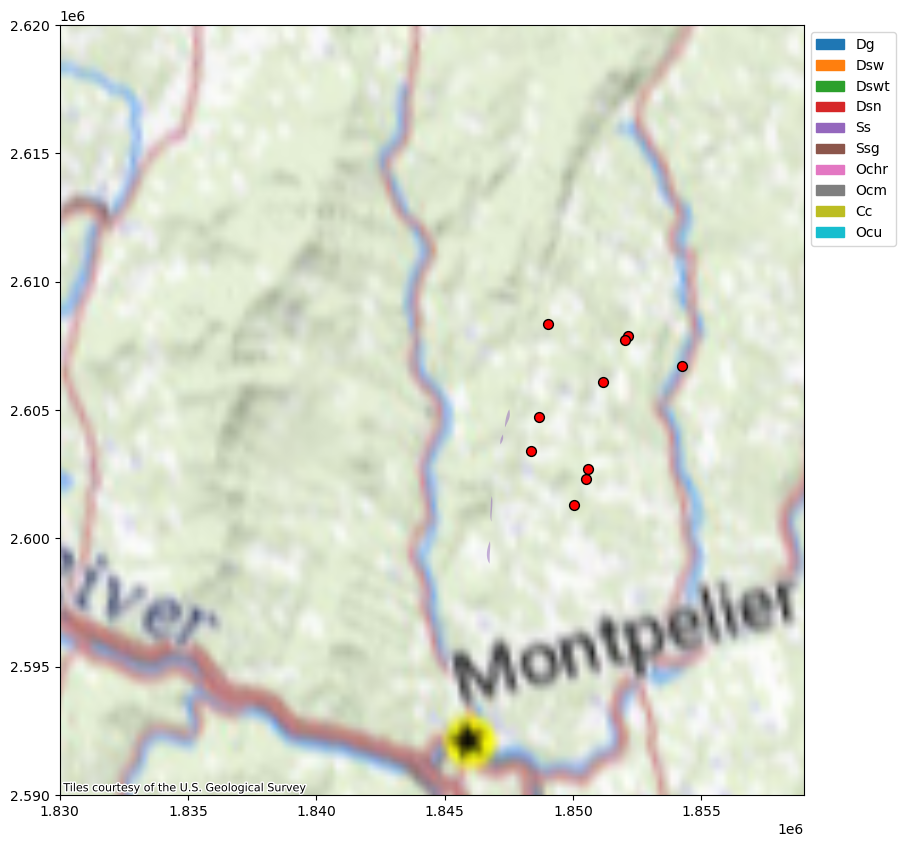

In [10]:
#####################
# READ IN LIBRARIES #
#####################

import pandas as pd  
import numpy as np  
import geopandas as gpd  
import matplotlib.pyplot as plt # plot our data and manipulate the plot
import contextily as ctx # add a default basemap under our polygons of interest
from shapely.geometry import Point, Polygon
import matplotlib.patches as mpatches

############################
# VIEW CONTEXTILY BASEMAPS #
############################

# Using contextily for basemaps (https://dlab.berkeley.edu/news/adding-basemaps-python-contextily)
# change basemap - can be one of these
# first see available provider names

#print(ctx.providers.keys())
#print(ctx.providers.USGS.keys())
#print(ctx.providers.OpenStreetMap.keys())

#####################################
# READ IN SHP FILES AND SITE COORDS #
#####################################

# Read in Vermont state boundary polygon;
# Vermont state bedrock unit shapefiles;
# And Calais, VT town hydro geo shapefiles
VT_poly = gpd.read_file('FS_VCGI_OPENDATA_Boundary_BNDHASH_poly_vtbnd_SP_v1_-7771789634029304711/FS_VCGI_OPENDATA_Boundary_BNDHASH_poly_vtbnd_SP_v1.shp')
VT_bedrock = gpd.read_file('Bedrock_Geologic_Map_of_Vermont_-_Units/Bedrock_Geologic_Map_of_Vermont_-_Units.shp')
Calais_bedrock = gpd.read_file("CalaisTownHydroGeo/CalaisTownHydroGeo/CalaisDepthToBRPolygon100Feet.shp")
Calais_infil = gpd.read_file("CalaisTownHydroGeo/CalaisTownHydroGeo/LowerSurfaceInfiltration.shp")

# Load the site coordinates and Calais bedrock units (subset of VT units, a csv I made)
site_coords = pd.read_csv("well-sites.csv")
calais_units = pd.read_csv("calais_units.csv")

# Convert well sites to a geodataframe using X (longitude) and Y (latitude)
site_coords = gpd.GeoDataFrame(
    site_coords,
    geometry=gpd.points_from_xy(site_coords['longitude'], site_coords['latitude']),
    crs="EPSG:4326"  # Assuming the data is in WGS84
)

############################
# FILTER FOR BEDROCK UNITS #
############################

# Define a statewide legend based on unique rock types
rock_types = VT_bedrock["CODE"].unique()
legend_patches = [
    mpatches.Patch(color=color, label=rock_type)
    for rock_type, color in zip(rock_types, plt.cm.tab10.colors[:len(rock_types)])
]

# Extract the unit codes for Calais subset
calais_bedrock_units = calais_units["Bedrock unit"].unique()

# Filter the Vermont bedrock data to include only the Calais units
calais_bedrock_data = VT_bedrock[VT_bedrock["CODE"].isin(calais_bedrock_units)]

###########################
# TRANSFORM TO COMMON CRS #
###########################

# Reproject everything to ESRI:102039
VT_poly_102039 = VT_poly.to_crs("ESRI:102039")
gdf_sites_102039 = site_coords.to_crs("ESRI:102039")
VT_bedrock_102039 = VT_bedrock.to_crs("ESRI:102039")
calais_bedrock_data_102039 = calais_bedrock_data.to_crs("ESRI:102039")

#################################
# DEBUG: CHECK GEOMETRY AND CRS #
#################################

#print(gdf_sites_102039)

print("Statewide bedrock CRS (reprojected):", VT_bedrock_102039.crs)
print("Filtered Calais bedrock CRS (reprojected):", calais_bedrock_data_102039.crs)
print("VT polygon CRS (reprojected):", VT_poly_102039.crs)
print("Izzy's well sites' CRS (reprojected):", gdf_sites_102039.crs)

################
# MAKE THE MAP #
################

fig, ax = plt.subplots(figsize=(10, 10))

# Create a color map for the specific bedrock units
calais_colors = {unit: color for unit, color in zip(calais_bedrock_units, plt.cm.tab10.colors[:len(calais_bedrock_units)])}

# Plot reprojected filtered bedrock units
calais_bedrock_data_102039.plot(
    ax=ax,
    column="CODE",
    color=[calais_colors[code] for code in calais_bedrock_data_102039["CODE"]],
    alpha=0.5,
    legend=False
)

# Add basemap in the correct projection
# Some commented-out basemaps options here
ctx.add_basemap(ax=ax, source=ctx.providers.USGS.USTopo, crs="ESRI:102039")
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=VT_poly_102039.crs, zoom=12)

# Plot the well site locations
gdf_sites_102039.plot(ax=ax, color='red', markersize=50, label="Izzy's wells", edgecolor = "black")

# Create custom legend
legend_patches = [
    mpatches.Patch(color=calais_colors[unit], label=unit)
    for unit in calais_bedrock_units
]
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

# Add zoom limits
ax.set_xlim([1830000, 1859000])
ax.set_ylim([2590000, 2620000])

# Temporarily remove zoom limits for debugging
#ax.set_xlim(None)
#ax.set_ylim(None)

In [11]:
print("Filtered Bedrock Bounds:", calais_bedrock_data_102039.total_bounds)
print("Plot Limits:", ax.get_xlim(), ax.get_ylim())

Filtered Bedrock Bounds: [1786361.8061856  2415275.58099803 1893008.34773047 2678039.38576243]
Plot Limits: (1830000.0, 1859000.0) (2590000.0, 2620000.0)


In [12]:
print("Available Bedrock Units in Filtered Data:", calais_bedrock_data_102039["CODE"].unique())
print("Calais Bedrock Units:", calais_bedrock_units)

Available Bedrock Units in Filtered Data: ['Ocu' 'Cc' 'Ss' 'Dg']
Calais Bedrock Units: ['Dg' 'Dsw' 'Dswt' 'Dsn' 'Ss' 'Ssg' 'Ochr' 'Ocm' 'Cc' 'Ocu']


In [6]:
rock_types

array(['DSfr', 'Dir', 'Di', 'Ocu', 'Os', 'Cdu', 'Dco', 'Ob', 'Cc', 'CZfp',
       'OCsk', 'Obku', 'Csp', 'CZpu', 'CZth', 'OCsw', 'OCg', 'Oml', 'Ohg',
       'CZun', 'Owb', 'CZhn', 'Osp', 'Dabg', 'CZf', 'Dgq', 'Oib', 'Dgqs',
       'Coq', 'CZwb', 'Co', 'DSw', 'DSwac', 'Omw', 'Dbg', 'CZsbg',
       'Ochsb', 'water', 'Ochv', 'CZu', 'Ochpq', 'Snd', 'Copw', 'CZs',
       'Coa', 'Sng', 'Cp', 'Obr', 'Ogf', 'Ochd', 'CZj', 'Dia', 'Ddbg',
       'Och', 'Sn', 'CZjg', 'Dcoa', 'Ochcv', 'CZutc', 'CZsd', 'CZhng',
       'Dedg', 'Jmsy', 'Dwdg', 'Debg', 'Ddrz', 'Ss', 'Ochu', 'CZsg',
       'OCskl', 'Jmg', 'Cps', 'Cpdo', 'Ochs', 'Cpq', 'Degr', 'Ochfv',
       'Jme', 'Dg', 'Cpc', 'Cpsh', 'Ocgu', 'Oo', 'Cpsc', 'CZung', 'Ov',
       'Ochuc', 'Dniz', 'Ochp', 'Ocp', 'Dnqm', 'Dnwz', 'Odp', 'Dih',
       'Oha', 'CZtagn', 'CZtm', 'Dga', 'CZpva', 'CZpvf', 'Cca', 'CZtp',
       'DSfra', 'DSwi', 'Dwmz', 'CZpvc', 'CZpv', 'Dwwz', 'OCsks',
       'CZbagn', 'CZbu', 'CZbf', 'CZbc', 'CZunw', 'CZbs', 'CZbg', 'Dwhz',
    